In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE  # install with: pip install imbalanced-learn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier  # install with: pip install xgboost
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import recall_score


In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.drop('id', axis=1, inplace=True)

In [4]:
df.shape

(5110, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
# Replace categorical values with numerical codes
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1, 'Other': 2})
df['ever_married'] = df['ever_married'].map({'No': 0, 'Yes': 1})
df['work_type'] = df['work_type'].map({
    'children': 0, 
    'Govt_job': 1, 
    'Never_worked': 2, 
    'Private': 3, 
    'Self-employed': 4
})
df['Residence_type'] = df['Residence_type'].map({'Rural': 0, 'Urban': 1})
df['smoking_status'] = df['smoking_status'].map({
    'formerly smoked': 0, 
    'never smoked': 1, 
    'smokes': 2, 
    'Unknown': 3
})


In [8]:
correlation_with_stroke = df.corr()['stroke'].drop('stroke')

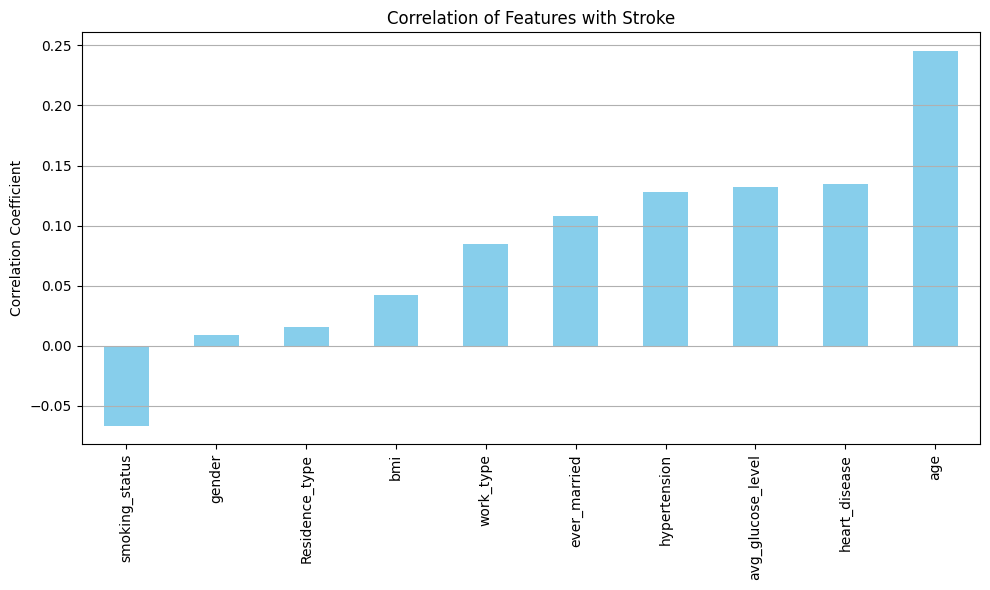

In [9]:
correlation_with_stroke.sort_values().plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title('Correlation of Features with Stroke')
plt.ylabel('Correlation Coefficient')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

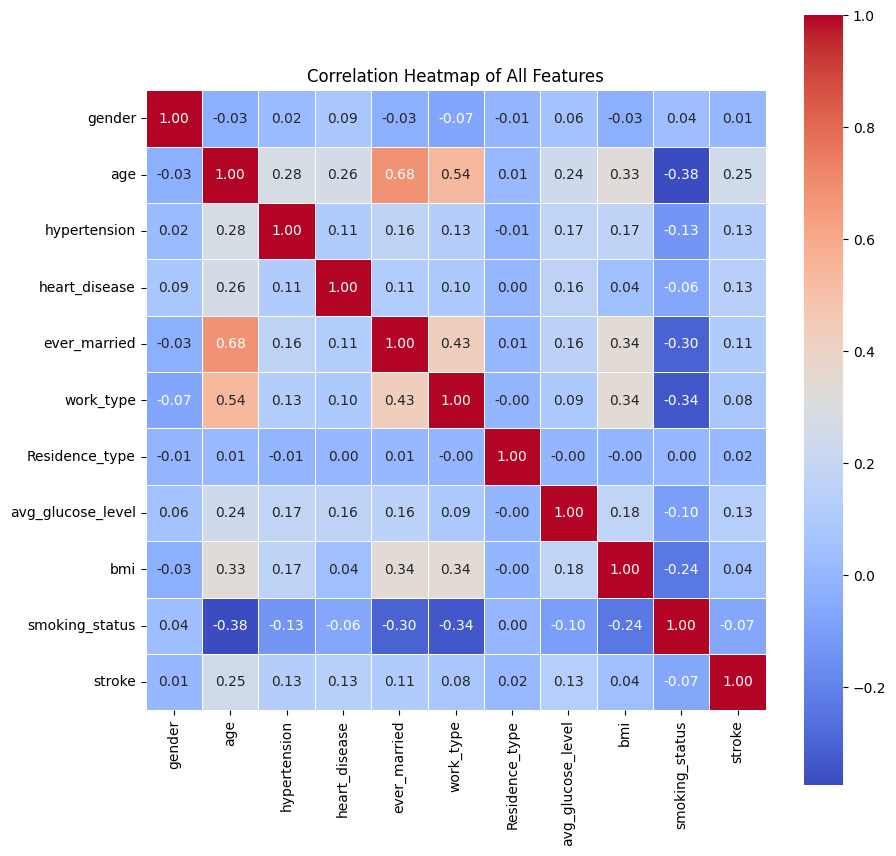

In [10]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', square=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of All Features')
plt.show()

In [11]:
bins = [0, 12, 19, 30, 60, 100]
labels = [0, 1, 2, 3, 4]
df['age'] = pd.cut(x=df['age'], bins=bins, labels=labels)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,4,0,1,1,3,1,228.69,36.6,0,1
1,0,4,0,0,1,4,0,202.21,NaN,1,1
2,1,4,0,1,1,3,0,105.92,32.5,1,1
3,0,3,0,0,1,3,1,171.23,34.4,2,1
4,0,4,1,0,1,4,0,174.12,24.0,1,1


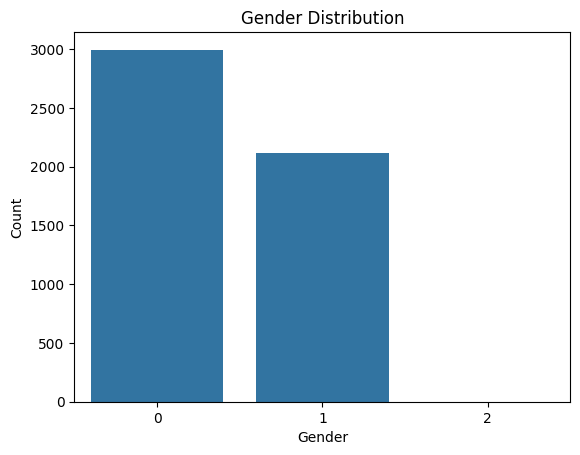

In [12]:
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

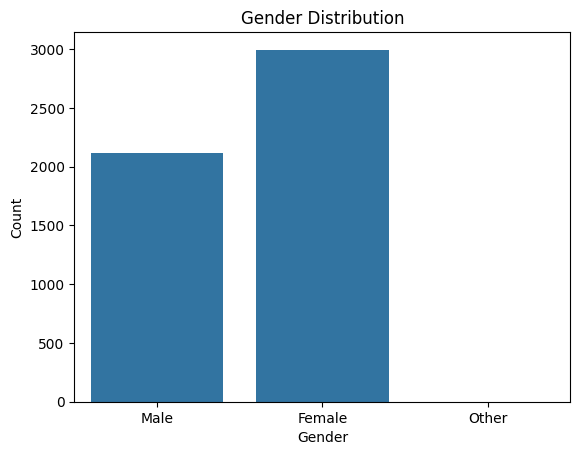

In [13]:
gender_map = {0: 'Female', 1: 'Male', 2: 'Other'}
df['gender_label'] = df['gender'].map(gender_map)

sns.countplot(x='gender_label', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Optional: drop 'gender_label' if not needed anymore
df.drop('gender_label', axis=1, inplace=True)

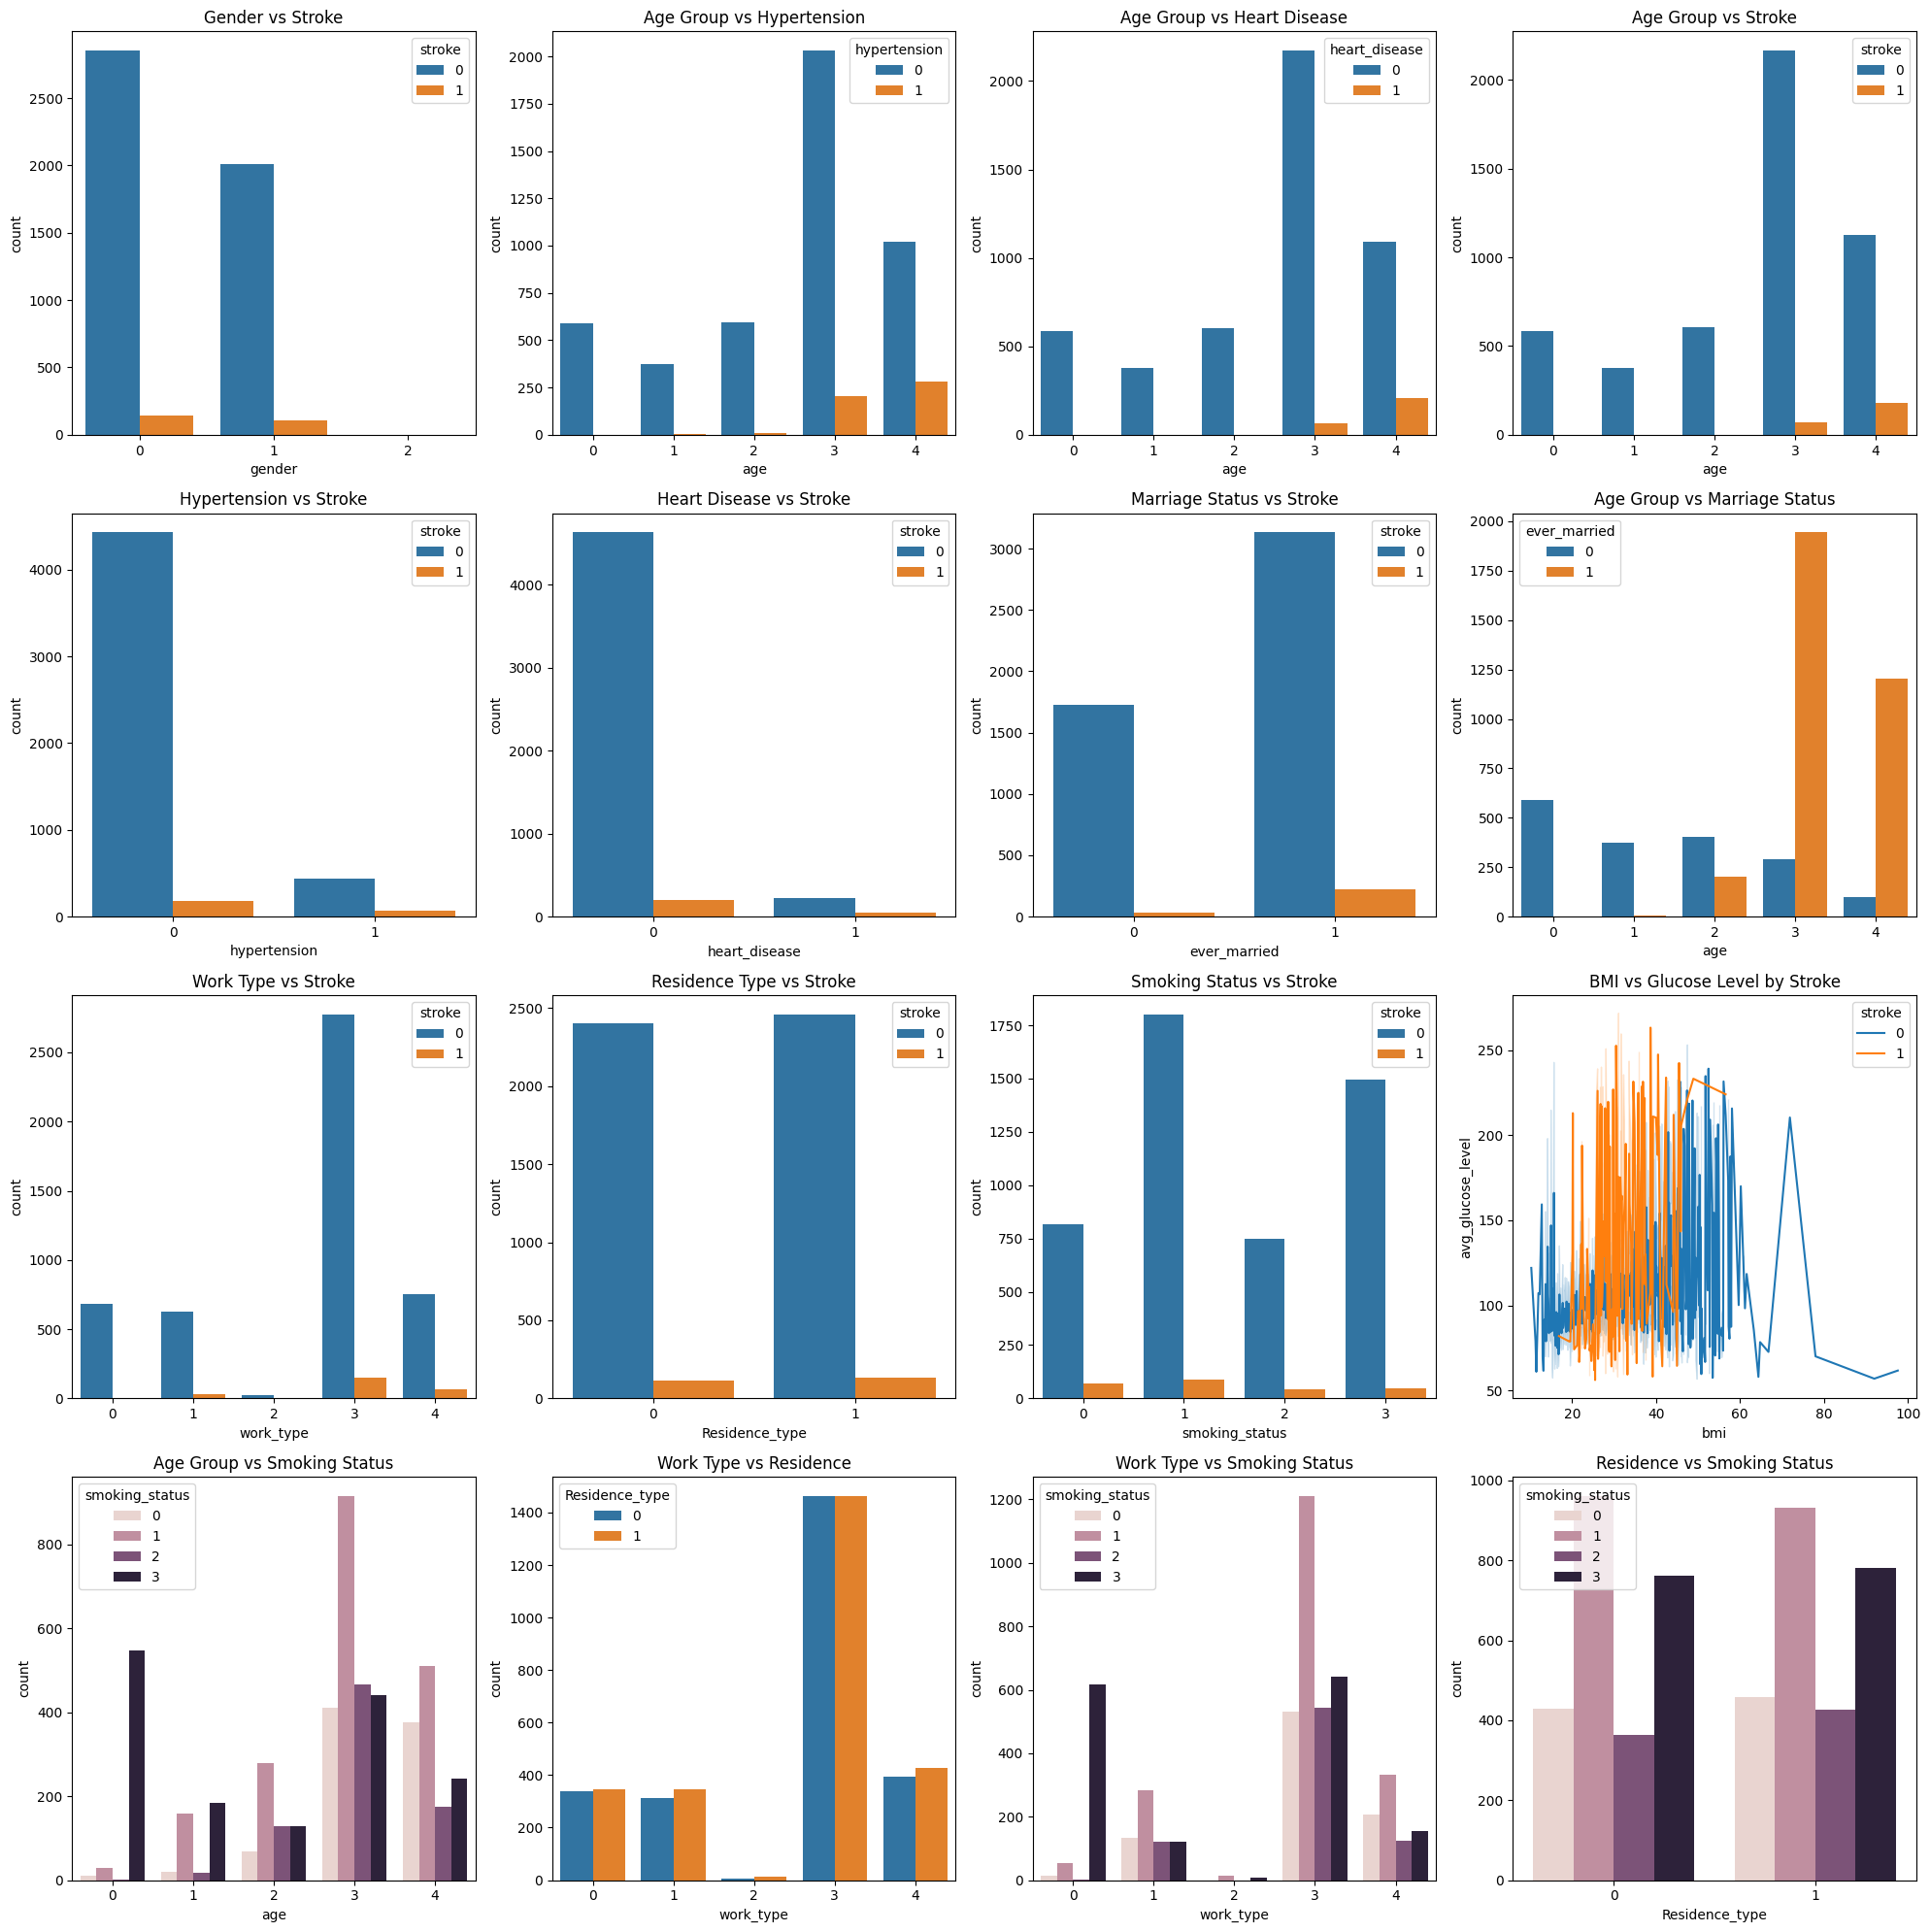

In [14]:
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(4, 4, figsize=(20, 20))

# Row 1
sns.countplot(x='gender', data=df, hue='stroke', ax=ax[0, 0])
ax[0, 0].set_title('Gender vs Stroke')

sns.countplot(x='age', data=df, hue='hypertension', ax=ax[0, 1])
ax[0, 1].set_title('Age Group vs Hypertension')

sns.countplot(x='age', data=df, hue='heart_disease', ax=ax[0, 2])
ax[0, 2].set_title('Age Group vs Heart Disease')

sns.countplot(x='age', data=df, hue='stroke', ax=ax[0, 3])
ax[0, 3].set_title('Age Group vs Stroke')

# Row 2
sns.countplot(x='hypertension', data=df, hue='stroke', ax=ax[1, 0])
ax[1, 0].set_title('Hypertension vs Stroke')

sns.countplot(x='heart_disease', data=df, hue='stroke', ax=ax[1, 1])
ax[1, 1].set_title('Heart Disease vs Stroke')

sns.countplot(x='ever_married', data=df, hue='stroke', ax=ax[1, 2])
ax[1, 2].set_title('Marriage Status vs Stroke')

sns.countplot(x='age', data=df, hue='ever_married', ax=ax[1, 3])
ax[1, 3].set_title('Age Group vs Marriage Status')

# Row 3
sns.countplot(x='work_type', data=df, hue='stroke', ax=ax[2, 0])
ax[2, 0].set_title('Work Type vs Stroke')

sns.countplot(x='Residence_type', data=df, hue='stroke', ax=ax[2, 1])
ax[2, 1].set_title('Residence Type vs Stroke')

sns.countplot(x='smoking_status', data=df, hue='stroke', ax=ax[2, 2])
ax[2, 2].set_title('Smoking Status vs Stroke')

sns.lineplot(x='bmi', y='avg_glucose_level', data=df, hue='stroke', ax=ax[2, 3])
ax[2, 3].set_title('BMI vs Glucose Level by Stroke')

# Row 4
sns.countplot(x='age', data=df, hue='smoking_status', ax=ax[3, 0])
ax[3, 0].set_title('Age Group vs Smoking Status')

sns.countplot(x='work_type', data=df, hue='Residence_type', ax=ax[3, 1])
ax[3, 1].set_title('Work Type vs Residence')

sns.countplot(x='work_type', data=df, hue='smoking_status', ax=ax[3, 2])
ax[3, 2].set_title('Work Type vs Smoking Status')

sns.countplot(x='Residence_type', data=df, hue='smoking_status', ax=ax[3, 3])
ax[3, 3].set_title('Residence vs Smoking Status')

# Layout fix
plt.tight_layout()
plt.show()


In [15]:
from sklearn.model_selection import train_test_split

# Split features and target
X = df.drop('stroke', axis=1)
y = df['stroke']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # optional but good for imbalanced data
)

# Check shape
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (4088, 10)
Test set shape: (1022, 10)


In [16]:
from sklearn.impute import SimpleImputer

# Replace NaNs with the mean (or use 'median' or 'most_frequent' as needed)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [17]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_imputed, y_train)


In [18]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_res, y_train_res)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [19]:
# Drop rows with any NaN in training data
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # sync y values

# Do the same for test set if needed
X_test = X_test.dropna()
y_test = y_test[X_test.index]


In [20]:
# Apply SMOTE on the training set
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE :", np.bincount(y_train_res))


Before SMOTE: [3756  162]
After SMOTE : [3756 3756]


In [21]:
def train_and_evaluate(model, model_name):
    print(f"\n🔹 {model_name}")
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    print("Accuracy      :", round(acc, 4))
    print("Recall        :", round(rec, 4))
    print("ROC AUC Score :", round(auc, 4))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [22]:
lr = LogisticRegression()
lr

LogisticRegression()

In [23]:
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9545913218970736

In [24]:
lr_pred = lr.predict(X_test)
accuracy_score(y_test, lr_pred)

0.9545913218970736

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the model
lr = LogisticRegression(max_iter=1000)
lr


LogisticRegression(max_iter=1000)

In [26]:

# Train the model
lr.fit(X_train, y_train)

# Check score on test set
lr.score(X_test, y_test)



0.9525731584258325

In [27]:
# Test the model
lr_pred = lr.predict(X_test)

# Accuracy score
accuracy_score(y_test, lr_pred)


0.9525731584258325

In [28]:
dt = DecisionTreeClassifier(random_state=42)

In [29]:
dt

DecisionTreeClassifier(random_state=42)

In [30]:
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.9101917255297679

In [31]:

dt_pred = dt.predict(X_test)
accuracy_score(y_test, dt_pred)

0.9101917255297679

In [32]:
rf = RandomForestClassifier(random_state=42)
rf

RandomForestClassifier(random_state=42)

In [33]:
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9495459132189707

In [34]:
rf_pred = rf.predict(X_test)
accuracy_score(y_test, rf_pred)

0.9495459132189707

In [35]:
svm = SVC(probability=True, random_state=42)
svm

SVC(probability=True, random_state=42)

In [36]:
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9525731584258325

In [37]:
svm_pred = svm.predict(X_test)
accuracy_score(y_test, svm_pred)

0.9525731584258325

In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in X_train.columns:
    if X_train[col].dtype.name == 'category' or X_train[col].dtype == 'object':
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])


In [39]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [40]:
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

0.9424823410696267

In [41]:
xgb_pred = xgb.predict(X_test)
accuracy_score(y_test, xgb_pred)

0.9424823410696267

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [44]:
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9505549949545913

In [45]:
knn_pred = knn.predict(X_test)
accuracy_score(y_test, knn_pred)

0.9505549949545913

In [46]:
from sklearn.ensemble import GradientBoostingClassifier


In [47]:
gb = GradientBoostingClassifier(random_state=42)
gb

GradientBoostingClassifier(random_state=42)

In [48]:
gb.fit(X_train, y_train)
gb.score(X_test, y_test)

0.9515640766902119

In [49]:
gb_pred = gb.predict(X_test)
accuracy_score(y_test, gb_pred)

0.9515640766902119

In [50]:
from sklearn.naive_bayes import GaussianNB

In [51]:
nb = GaussianNB()
nb

GaussianNB()

In [52]:
nb.fit(X_train, y_train)
nb.score(X_test,y_test)

0.8557013118062563

In [53]:
nb_pred = nb.predict(X_test)
accuracy_score(y_test, nb_pred)

0.8557013118062563

In [54]:
from sklearn import metrics

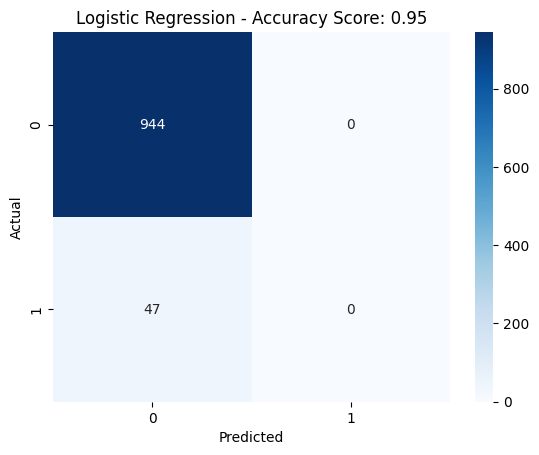

In [55]:
sns.heatmap(metrics.confusion_matrix(y_test, lr_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression - Accuracy Score: {:.2f}'.format(accuracy_score(y_test, lr_pred)))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


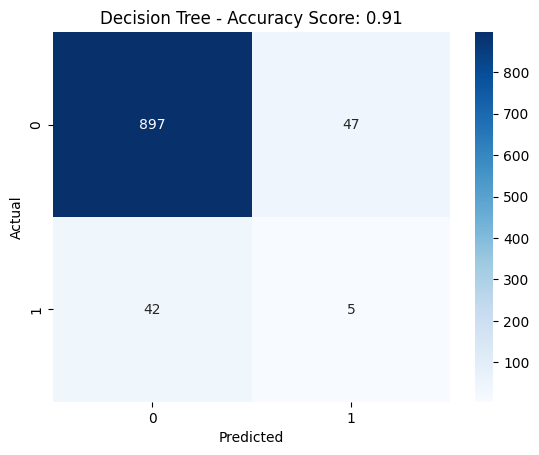

In [56]:
sns.heatmap(metrics.confusion_matrix(y_test, dt_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree - Accuracy Score: {:.2f}'.format(accuracy_score(y_test, dt_pred)))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


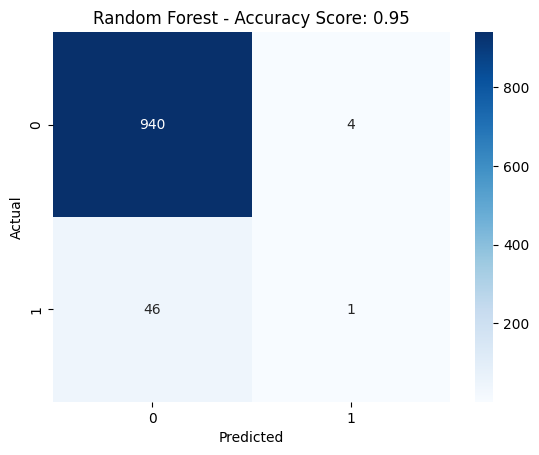

In [57]:
sns.heatmap(metrics.confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest - Accuracy Score: {:.2f}'.format(accuracy_score(y_test, rf_pred)))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


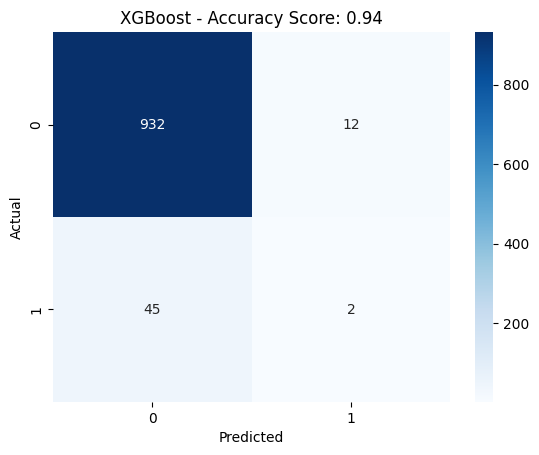

In [58]:
sns.heatmap(metrics.confusion_matrix(y_test, xgb_pred), annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost - Accuracy Score: {:.2f}'.format(accuracy_score(y_test, xgb_pred)))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


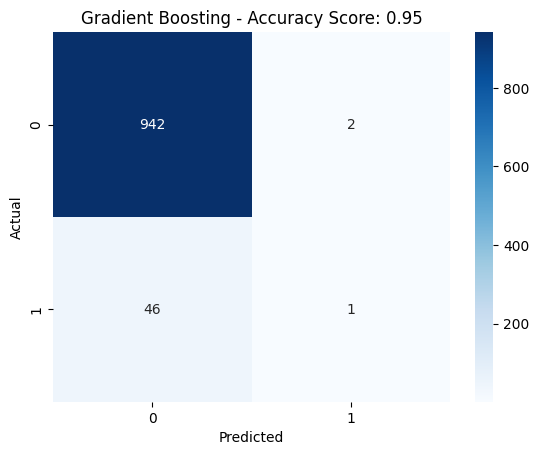

In [59]:
sns.heatmap(metrics.confusion_matrix(y_test, gb_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting - Accuracy Score: {:.2f}'.format(accuracy_score(y_test, gb_pred)))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


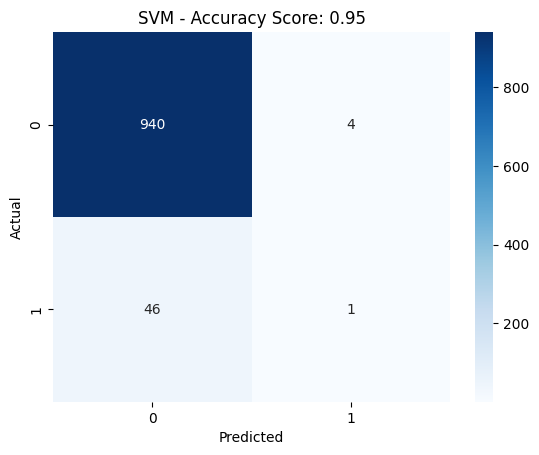

In [60]:
sns.heatmap(metrics.confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues')
plt.title('SVM - Accuracy Score: {:.2f}'.format(accuracy_score(y_test, rf_pred)))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


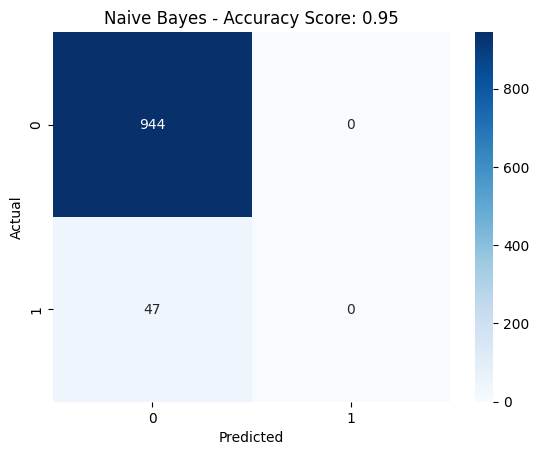

In [61]:
sns.heatmap(metrics.confusion_matrix(y_test, lr_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes - Accuracy Score: {:.2f}'.format(accuracy_score(y_test, lr_pred)))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

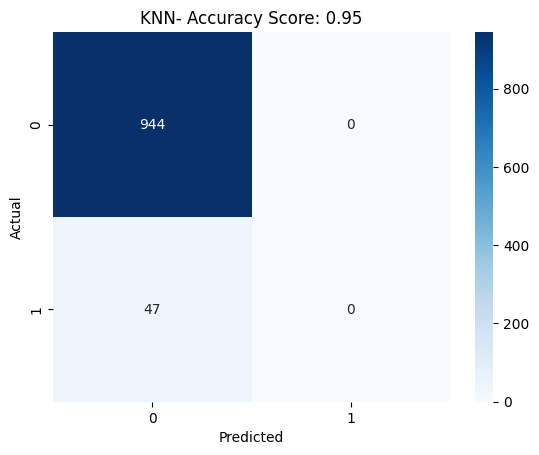

In [62]:
sns.heatmap(metrics.confusion_matrix(y_test, lr_pred), annot=True, fmt='d', cmap='Blues')
plt.title('KNN- Accuracy Score: {:.2f}'.format(accuracy_score(y_test, lr_pred)))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

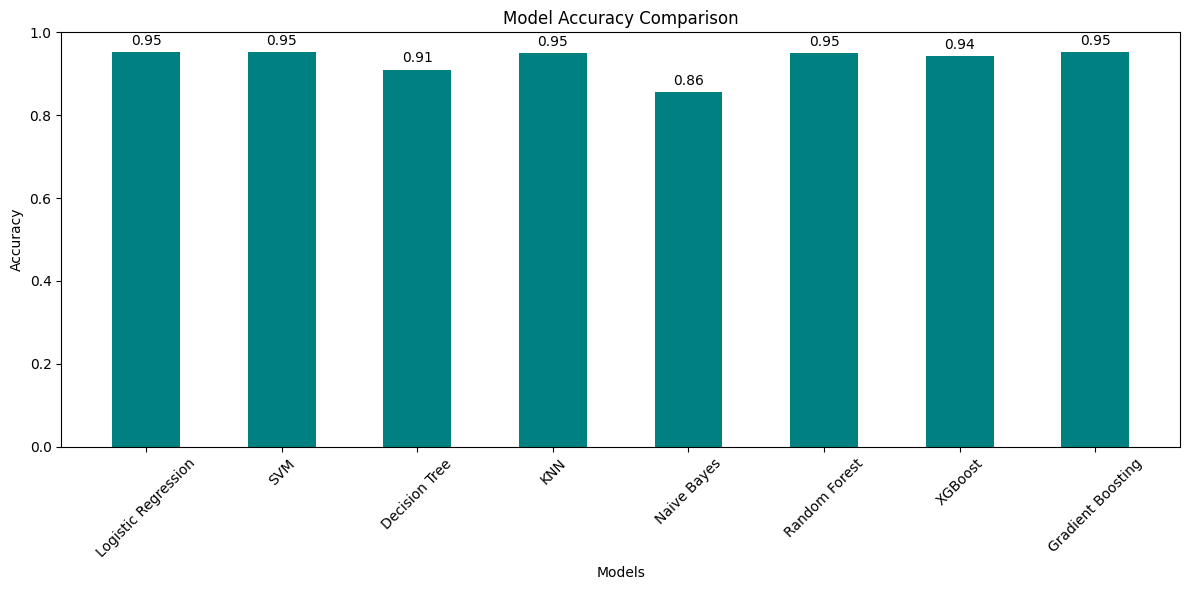

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Define model names and their corresponding predictions
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN', 'Naive Bayes', 'Random Forest', 'XGBoost', 'Gradient Boosting']
accuracies = [
    accuracy_score(y_test, lr_pred),
    accuracy_score(y_test, svm_pred),
    accuracy_score(y_test, dt_pred),
    accuracy_score(y_test, knn_pred),
    accuracy_score(y_test, nb_pred),
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, xgb_pred),
    accuracy_score(y_test, gb_pred)
]

# Plotting
plt.figure(figsize=(12,6))
bars = plt.bar(models, accuracies, color='teal', width=0.5)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)

# Annotate bars with accuracy values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [64]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Dictionary to store all models and their predictions
model_results = {
    'Logistic Regression': lr.predict(X_test),
    'SVM': svm.predict(X_test),
    'Decision Tree': dt.predict(X_test),
    'KNN': knn.predict(X_test),
    'Naive Bayes': nb.predict(X_test),
    'Random Forest': rf.predict(X_test),
    'XGBoost': xgb.predict(X_test),
    'Gradient Boosting': gb.predict(X_test)
}

# Prepare evaluation results
evaluation = []

for model_name, y_pred in model_results.items():
    evaluation.append({
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

# Convert to DataFrame for display
eval_df = pd.DataFrame(evaluation)

# Display
print(eval_df.sort_values(by='F1 Score', ascending=False))


                 Model  Accuracy    Recall  Precision  F1 Score
4          Naive Bayes  0.855701  0.382979   0.136364  0.201117
2        Decision Tree  0.910192  0.106383   0.096154  0.101010
6              XGBoost  0.942482  0.042553   0.142857  0.065574
7    Gradient Boosting  0.951564  0.021277   0.333333  0.040000
5        Random Forest  0.949546  0.021277   0.200000  0.038462
3                  KNN  0.950555  0.000000   0.000000  0.000000
0  Logistic Regression  0.952573  0.000000   0.000000  0.000000
1                  SVM  0.952573  0.000000   0.000000  0.000000


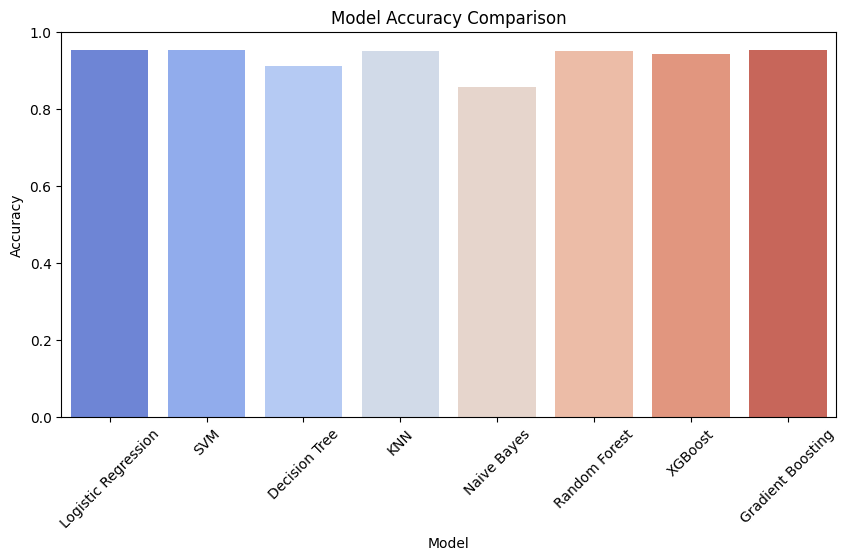

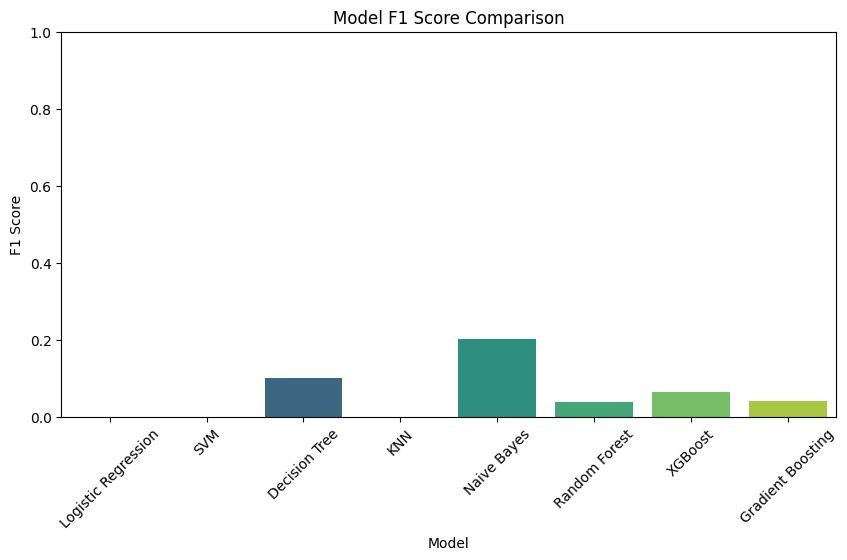

In [65]:
# Plot Accuracy Comparison
plt.figure(figsize=(10,5))
sns.barplot(x='Model', y='Accuracy', data=eval_df, palette='coolwarm')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

# Plot F1 Score Comparison
plt.figure(figsize=(10,5))
sns.barplot(x='Model', y='F1 Score', data=eval_df, palette='viridis')
plt.title('Model F1 Score Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()


In [66]:
from sklearn.preprocessing import LabelEncoder

# Keep copies of encoders so you can use them later in prediction
le_gender = LabelEncoder()
le_ever = LabelEncoder()
le_work = LabelEncoder()
le_residence = LabelEncoder()
le_smoke = LabelEncoder()

# Fit encoders on the ORIGINAL string data
le_gender.fit(df['gender'].dropna())
le_ever.fit(df['ever_married'].dropna())
le_work.fit(df['work_type'].dropna())
le_residence.fit(df['Residence_type'].dropna())
le_smoke.fit(df['smoking_status'].dropna())

# Now encode the columns
df['gender'] = le_gender.transform(df['gender'])
df['ever_married'] = le_ever.transform(df['ever_married'])
df['work_type'] = le_work.transform(df['work_type'])
df['Residence_type'] = le_residence.transform(df['Residence_type'])
df['smoking_status'] = le_smoke.transform(df['smoking_status'])


In [67]:
def predict_stroke_numeric_input(gender, age, hypertension, heart_disease,
                                 ever_married, work_type, residence_type,
                                 avg_glucose, bmi, smoking_status):
    try:
        # Create input array
        input_data = [[gender, age, hypertension, heart_disease,
                       ever_married, work_type, residence_type,
                       avg_glucose, bmi, smoking_status]]

        # Predict using the best model
        prediction = best_model.predict(input_data)[0]

        # Output result
        if prediction == 1:
            print(" High Risk of Stroke")
        else:
            print("Low Risk of Stroke")

    except Exception as e:
        print("Error:", str(e))


In [68]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,4,0,1,1,3,1,228.69,36.6,0,1
1,0,4,0,0,1,4,0,202.21,NaN,1,1
2,1,4,0,1,1,3,0,105.92,32.5,1,1
3,0,3,0,0,1,3,1,171.23,34.4,2,1
4,0,4,1,0,1,4,0,174.12,24.0,1,1


In [69]:
# Assign your best-performing trained model
best_model = svm  # or lr, svm, dt, etc.

# Then call the prediction function with inputs
predict_stroke_numeric_input(
    gender=1,                # 0 = Male, 1 = Female
    age=55,
    hypertension=0,
    heart_disease=0,
    ever_married=1,          # 1 = Yes, 0 = No
    work_type=2,             # based on your encoding
    residence_type=1,        # 1 = Urban, 0 = Rural
    avg_glucose=105.4,
    bmi=26.7,
    smoking_status=2         # based on your encoding
)


Low Risk of Stroke


In [70]:
def predict_stroke_numeric_input(gender, age, hypertension, heart_disease,
                                 ever_married, work_type, residence_type,
                                 avg_glucose, bmi, smoking_status):
    # Input as a single sample (2D array)
    input_data = [[gender, age, hypertension, heart_disease,
                   ever_married, work_type, residence_type,
                   avg_glucose, bmi, smoking_status]]

    # Get probability from best_model
    probability = best_model.predict_proba(input_data)[0][1]  # Probability of class 1 (stroke)

    # Convert to percentage
    stroke_risk_percent = round(probability * 100, 2)

    print(f"\n🧠 Predicted Stroke Risk: {stroke_risk_percent}%")

    # Optional message
    if stroke_risk_percent >= 50:
        print("⚠️ High Risk of Stroke")
    else:
        print("✅ Low Risk of Stroke")


In [71]:
df['stroke'].value_counts()


stroke
0    4861
1     249
Name: count, dtype: int64

In [72]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [73]:
xgb = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb.fit(X_resampled, y_resampled)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [75]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      1.00      0.98       944
           1       0.33      0.02      0.04        47

    accuracy                           0.95       991
   macro avg       0.64      0.51      0.51       991
weighted avg       0.92      0.95      0.93       991



In [76]:
def predict_stroke_numeric_input(
    gender, age, hypertension, heart_disease, ever_married,
    work_type, residence_type, avg_glucose, bmi, smoking_status,
    model, threshold=0.3
):
    features = np.array([[gender, age, hypertension, heart_disease,
                          ever_married, work_type, residence_type,
                          avg_glucose, bmi, smoking_status]])
    
    probability = model.predict_proba(features)[0][1]  # Probability of stroke
    risk = "High" if probability >= threshold else "Low"
    
    print(f"\n🧠 Predicted Stroke Risk: {probability * 100:.2f}%")
    print(f"➡️ Risk Category: {risk} Risk (Threshold = {threshold})")


In [77]:
from sklearn.metrics import recall_score, precision_score, f1_score

# Step 1: Get probability of stroke (class 1)
y_probs = xgb.predict_proba(X_test)[:, 1]  # only take probability for class 1 (stroke)

# Step 2: Try different thresholds
thresholds = [0.5, 0.4, 0.3, 0.2]
for t in thresholds:
    y_pred_thresh = (y_probs >= t).astype(int)
    print(f"\nThreshold = {t}")
    print("Recall:", recall_score(y_test, y_pred_thresh))
    print("Precision:", precision_score(y_test, y_pred_thresh))
    print("F1:", f1_score(y_test, y_pred_thresh))



Threshold = 0.5
Recall: 0.2765957446808511
Precision: 0.10483870967741936
F1: 0.15204678362573099

Threshold = 0.4
Recall: 0.2978723404255319
Precision: 0.0875
F1: 0.13526570048309178

Threshold = 0.3
Recall: 0.3404255319148936
Precision: 0.08121827411167512
F1: 0.13114754098360656

Threshold = 0.2
Recall: 0.48936170212765956
Precision: 0.08679245283018867
F1: 0.14743589743589744


In [78]:
thresholds = [0.5, 0.4, 0.3, 0.2]
for t in thresholds:
    y_pred_thresh = (y_probs >= t).astype(int)
    print(f"\nThreshold = {t}")
    print("Recall:", recall_score(y_test, y_pred_thresh))
    print("Precision:", precision_score(y_test, y_pred_thresh))
    print("F1:", f1_score(y_test, y_pred_thresh))



Threshold = 0.5
Recall: 0.2765957446808511
Precision: 0.10483870967741936
F1: 0.15204678362573099

Threshold = 0.4
Recall: 0.2978723404255319
Precision: 0.0875
F1: 0.13526570048309178

Threshold = 0.3
Recall: 0.3404255319148936
Precision: 0.08121827411167512
F1: 0.13114754098360656

Threshold = 0.2
Recall: 0.48936170212765956
Precision: 0.08679245283018867
F1: 0.14743589743589744


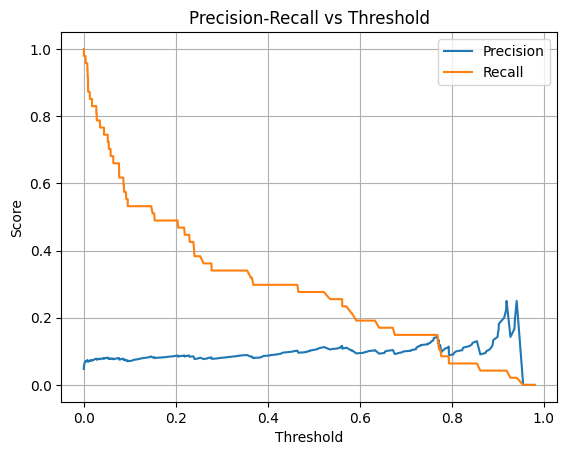

In [81]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold")
plt.legend()
plt.grid()
plt.show()


In [82]:
def predict_stroke_numeric_input(
    gender, age, hypertension, heart_disease, ever_married,
    work_type, residence_type, avg_glucose, bmi, smoking_status,
    model=xgb, threshold=0.3
):
    features = np.array([[gender, age, hypertension, heart_disease,
                          ever_married, work_type, residence_type,
                          avg_glucose, bmi, smoking_status]])
    
    probability = model.predict_proba(features)[0][1]
    risk = "High" if probability >= threshold else "Low"
    
    print(f"\n🧠 Predicted Stroke Risk: {probability * 100:.2f}%")
    print(f"➡️ Risk Category: {risk} Risk")

# Example usage:
predict_stroke_numeric_input(
    gender=1, age=78, hypertension=1, heart_disease=1, ever_married=1,
    work_type=2, residence_type=1, avg_glucose=250.0, bmi=36.5, smoking_status=1
)



🧠 Predicted Stroke Risk: 97.33%
➡️ Risk Category: High Risk


In [84]:
from sklearn.ensemble import RandomForestClassifier

# Assume X_train and y_train are already prepared
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [87]:
import pickle

# Save Random Forest model
with open('stroke_model_rf.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save label encoders
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)


In [88]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df = df.drop("id", axis=1)

# Fill missing values
df['bmi'].fillna(df['bmi'].median(), inplace=True)

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split data
X = df.drop("stroke", axis=1)
y = df["stroke"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb.fit(X_train, y_train)

# ------------------------------
# Function to predict from input
# ------------------------------
def predict_stroke_numeric_input(
    gender, age, hypertension, heart_disease, ever_married,
    work_type, residence_type, avg_glucose, bmi, smoking_status,
    model=xgb, threshold=0.3
):
    features = np.array([[gender, age, hypertension, heart_disease,
                          ever_married, work_type, residence_type,
                          avg_glucose, bmi, smoking_status]])
    
    probability = model.predict_proba(features)[0][1]
    risk = "High" if probability >= threshold else "Low"

    print(f"\n🧠 Predicted Stroke Risk: {probability * 100:.2f}%")
    print(f"➡️ Risk Category: {risk} Risk")

    if risk == "High":
        print("\n🩺 Next Steps You Should Consider:")
        print("""
- Schedule a medical checkup with a doctor or cardiologist.
- Take steps to control blood pressure, blood sugar, and cholesterol.
- Stop smoking and reduce alcohol intake.
- Follow a heart-healthy diet and stay active.
- Follow prescribed treatments and monitor your health regularly.
""")

    return {
        "probability": probability,
        "risk_category": risk
    }

# Example usage:
predict_stroke_numeric_input(
    gender=1, age=78, hypertension=1, heart_disease=1, ever_married=1,
    work_type=2, residence_type=1, avg_glucose=250.0, bmi=36.5, smoking_status=1
)



🧠 Predicted Stroke Risk: 88.82%
➡️ Risk Category: High Risk

🩺 Next Steps You Should Consider:

- Schedule a medical checkup with a doctor or cardiologist.
- Take steps to control blood pressure, blood sugar, and cholesterol.
- Stop smoking and reduce alcohol intake.
- Follow a heart-healthy diet and stay active.
- Follow prescribed treatments and monitor your health regularly.



{'probability': np.float32(0.8881872), 'risk_category': 'High'}